In [20]:
# Import necessary modules for TARDIS High Energy Workflow
import matplotlib.pyplot as plt

from tardis.io.atom_data import download_atom_data, AtomData
from tardis.io.configuration.config_reader import Configuration
from tardis.workflows.high_energy.tardis_he_workflow import TARDISHEWorkflow

# TARDIS High Energy Workflow Tutorial

This notebook demonstrates how to use the TARDIS High Energy (HE) Workflow to simulate gamma-ray transport in supernova ejecta. The HE workflow is specifically designed to model high-energy phenomena in supernovae, including:

- Gamma-ray transport through the ejecta
- Energy deposition processes
- Positron-electron pair creation
- Compton scattering
- Photoabsorption processes

In this example, we'll simulate a **white dwarf merger scenario for Type Ia supernovae** based on the HESMA (Heidelberg Supernova Model Archive) dataset and the model from **Pakmor et al. (2012)**. This represents a double-detonation scenario where gamma-rays from radioactive decay (primarily ⁵⁶Ni → ⁵⁶Co → ⁵⁶Fe) play a crucial role in powering the optical light curve.

This tutorial is based on the methodology and results presented in **Dutta et al. (2025)**, which demonstrates the application of the TARDIS HE workflow to Type Ia supernova models and provides detailed analysis of gamma-ray transport in these systems.

In [21]:
# Download and load atomic data
# We recommend using the latest atomic data from the TARDIS data repository
atomic_data_fname = 'kurucz_cd23_chianti_H_He_latest'
download_atom_data(atomic_data_fname)
atom_data = AtomData.from_hdf('kurucz_cd23_chianti_H_He_latest.h5')

INFO:tardis.io.atom_data.util:
	Atom Data kurucz_cd23_chianti_H_He_latest.h5 not found in local path.
	Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He_latest.h5
INFO:tardis.io.atom_data.util:
	Atom Data kurucz_cd23_chianti_H_He_latest.h5 not found in local path.
	Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He_latest.h5
INFO:tardis.io.atom_data.base:Reading Atom Data with: UUID = b58b2ef63bf811f08edf96479f911fbd MD5  = 5d80fa4ae0638469bf1ff281b6ca2a94 
INFO:tardis.io.atom_data.base:Non provided Atomic Data: levels, lines, collision_data, collision_data_temperatures, synpp_refs, photoionization_data, yg_data, two_photon_data, linelist_atoms, linelist_molecules
INFO:tardis.io.atom_data.base:Reading Atom Data with: UUID = b58b2ef63bf811f08edf96479f911fbd MD5  = 5d80fa4ae0638469bf1ff281b6ca2a94 
INFO:tardis.io.atom_data.base:Non provided Atomic Data: levels, lines, collision_data, collision_data

In [22]:
# Load the HESMA white dwarf merger configuration (Pakmor et al. 2012)
# This configuration represents a Type Ia supernova from a double-detonation scenario

config_file = "tardis_config_merger_2012.yml"
config = Configuration.from_yaml(config_file)

In [23]:
# Initialize the TARDIS High Energy Workflow
he_workflow = TARDISHEWorkflow(atom_data=atom_data,
    configuration=config,
    config_type="csvy"
)

INFO:tardis.model.matter.decay:Decaying abundances for 2600540.0352 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 2600540.0352 seconds


In [24]:
# Run the High Energy simulation for Type Ia supernova
# These parameters are optimized for white dwarf merger gamma-ray transport

simulation_params = {
    "time_start": 1.0,           # Start time in days (early in SN evolution)
    "time_end": 200.0,           # End time in days (covers main decay period)
    "number_of_packets": int(1e6),  # Number of gamma-ray packets (reduced for demo)
    "time_steps": 100,           # Number of time steps
    "time_space": "log",         # Logarithmic time spacing (appropriate for decay)
    "seed": 1993,                # Random seed for reproducibility
    "fp": 1.0,                   # Covering factor
    "spectrum_bins": 300,        # Number of spectrum bins
    "grey_opacity": -1,          # Use detailed opacity calculation
    "legacy": True,
    "legacy_atom_data":atom_data              # Use legacy mode for compatibility
}

# Run the simulation
he_result = he_workflow.run(**simulation_params)

INFO:tardis.model.matter.decay:Decaying abundances for 4701.188426344143 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 4956.989035371836 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 4956.989035371836 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5226.70824234642 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5226.70824234642 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5511.103384670451 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5511.103384670451 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5810.973007915826 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 5810.973007915826 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 6127.159108038637 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 6127.159108038637 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 6460.5494955974455 seconds
INFO:tardis.model.matter.deca

Entering gamma ray loop for 1000000 packets
Number of escaped packets: 451200
Number of scattered packets: 95665


## Analyzing the Results

The TARDIS HE workflow produces several key outputs that provide insights into the high-energy processes in Type Ia supernovae:

### Key Physical Outputs

1. **`escape_energy`**: Energy of gamma-rays that escape the ejecta without interaction
   - Critical for understanding the gamma-ray light curve and detectability
   - Determines the energy available for optical/UV emission via thermalization

3. **`packets_escaped`**: Information about packets that escaped the simulation
   - Provides statistics on gamma-ray escape probabilities
   - Shows energy and directional distributions

4. **`gamma_ray_deposited_energy`**: Energy deposited by gamma-rays in the ejecta
   - Drives the heating that powers the optical light curve
   - Key to understanding the energy budget of Type Ia SNe

5. **`total_deposited_energy`**: Total energy deposited from all processes
   - Includes both gamma-rays and positrons from ⁵⁶Co decay
   - Essential for light curve modeling

6. **`positron_energy`**: Energy from positron-electron pair creation and ⁵⁶Co decay
   - Important energy source in the nebular phase
   - Affects late-time spectral features

### Type Ia Supernova Context

The white dwarf merger scenario (Pakmor et al. 2012) represents a double-detonation model where:
- Primary detonation occurs in surface helium layer
- Secondary detonation triggers carbon burning in the core
- ⁵⁶Ni production powers the characteristic light curve
- Gamma-ray transport determines energy thermalization efficiency

Let's examine and visualize these results:

In [ ]:
# Dutta paper

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


[]

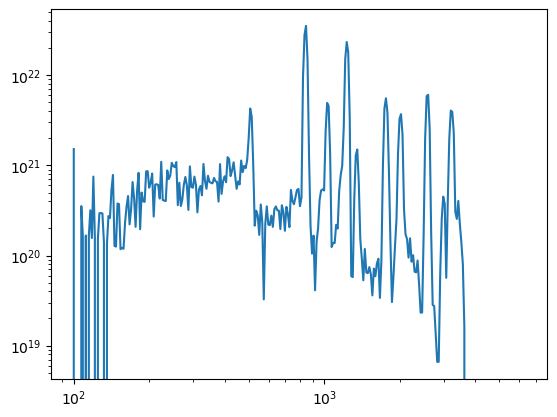

In [35]:
%pylab inline

plt.clf()
plt.plot(he_result.escape_energy.index.values, he_result.escape_energy.iloc[:,-1])
plt.loglog()

In [ ]:
# Plot the gamma-ray light curve
plt.figure(figsize=(10, 6))

if hasattr(he_result, 'escape_energy'):
    escape_data = he_result.escape_energy
    if hasattr(escape_data, 'index'):
        # Calculate total escape energy as a function of time
        total_escape = escape_data.sum(axis=1)
        
        plt.loglog(total_escape.index, total_escape.values, 'b-', linewidth=2, label='Gamma-ray luminosity')
        plt.xlabel('Time since explosion (days)')
        plt.ylabel('Gamma-ray luminosity (erg/s)')
        plt.title('Gamma-Ray Light Curve\n(Type Ia Supernova - White Dwarf Merger)')
        plt.grid(True, alpha=0.3)
        
        # Add decay time markers
        plt.axvline(6.1, color='red', linestyle='--', alpha=0.7, label='⁵⁶Ni t₁/₂ = 6.1 days')
        plt.axvline(77.1, color='orange', linestyle='--', alpha=0.7, label='⁵⁶Co t₁/₂ = 77.1 days')
        
        plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot energy deposition and thermalization efficiency
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Energy deposition vs time
if hasattr(he_result, 'gamma_ray_deposited_energy'):
    deposited_data = he_result.gamma_ray_deposited_energy
    if hasattr(deposited_data, 'index'):
        deposited_total = deposited_data.sum(axis=1)
        
        ax1.loglog(deposited_total.index, deposited_total.values, 'r-', linewidth=2, label='Gamma-ray deposited')
        
        # Also plot positron energy if available
        if hasattr(he_result, 'positron_energy'):
            positron_data = he_result.positron_energy
            if hasattr(positron_data, 'index'):
                positron_total = positron_data.sum(axis=1)
                ax1.loglog(positron_total.index, positron_total.values, 'm--', linewidth=2, label='Positron energy')
        
        ax1.set_xlabel('Time since explosion (days)')
        ax1.set_ylabel('Deposited energy (erg/s)')
        ax1.set_title('Energy Deposition Rate')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

# Right plot: Thermalization efficiency
if all(hasattr(he_result, attr) for attr in ['escape_energy', 'gamma_ray_deposited_energy']):
    escape_total = he_result.escape_energy.sum(axis=1)
    deposited_total = he_result.gamma_ray_deposited_energy.sum(axis=1)
    total_energy = escape_total + deposited_total
    thermalization_eff = deposited_total / total_energy
    
    ax2.semilogx(escape_total.index, thermalization_eff, 'purple', linewidth=2, label='Thermalization efficiency')
    ax2.set_xlabel('Time since explosion (days)')
    ax2.set_ylabel('Fraction thermalized')
    ax2.set_title('Gamma-Ray Thermalization Efficiency')
    ax2.set_ylim(0, 1)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

plt.tight_layout()
plt.show()

## Conclusions and Next Steps

This tutorial demonstrated how to use the TARDIS High Energy Workflow to simulate gamma-ray transport in Type Ia supernova ejecta. The example used a **white dwarf merger model from HESMA** (Pakmor et al. 2012), representing a double-detonation scenario that is a leading candidate for Type Ia supernova progenitors.

### Key Physical Processes in Type Ia Supernovae

- **⁵⁶Ni → ⁵⁶Co → ⁵⁶Fe decay chain**: Primary energy source for optical light curves
- **Gamma-ray thermalization**: Conversion of radioactive energy to thermal energy
- **Ejecta expansion**: Decreasing density affects gamma-ray opacity and escape
- **Compton scattering**: Dominant interaction mechanism for gamma-ray transport
- **Positron heating**: Important energy source in the nebular phase (t > 100 days)

### Scientific Applications

#### Light Curve Modeling
- **Energy deposition rates** directly determine bolometric light curves
- **Thermalization efficiency** affects peak brightness and decline rates
- **Gamma-ray escape** influences early-time and late-time behavior

#### Multi-Messenger Astronomy
- **Gamma-ray predictions** for space-based detectors (e.g., COSI, INTEGRAL)
- **Positron annihilation lines** provide diagnostics of explosion geometry
- **Energy budget constraints** test supernova explosion models

#### Progenitor Discrimination
- **White dwarf merger models** vs. single-degenerate scenarios
- **⁵⁶Ni distribution** affects gamma-ray transport and observables
- **Explosion geometry** influences directional gamma-ray emission

### Model Customization

The HESMA framework provides multiple explosion models:

```python
# Available HESMA models for different scenarios:
# - Single-degenerate Chandrasekhar mass explosions
# - Sub-Chandrasekhar double-detonation models  
# - Different central densities and ignition conditions
# - Various white dwarf compositions (C/O ratios)

# Example: Load different HESMA model
config_file = "tardis_config_sub_chandra.yml"  # Sub-Chandrasekhar model
config_file = "tardis_config_chandrasekhar.yml"  # Chandrasekhar mass model
```

### Advanced Simulations

For research-quality results:

```python
simulation_params = {
    "number_of_packets": int(1e6),     # Better statistics
    "time_steps": 500,                 # Higher temporal resolution
    "spectrum_bins": 1000,             # Detailed energy spectra
    "time_start": 0.1,                 # Earlier start time
    "time_end": 1000.0,                # Extended nebular phase
}
```

### Performance Optimization

- **Parallel processing**: Utilize multiple CPU cores for packet transport
- **Memory management**: Consider RAM requirements for large models
- **Time step optimization**: Balance accuracy vs. computational cost
- **Spectrum binning**: Adjust energy resolution based on science goals

### Integration with Observations

The HE workflow results can be compared with:

- **Gamma-ray observations**: SPI/INTEGRAL, COMPTEL measurements
- **Optical light curves**: Ground-based and space-based photometry  
- **Late-time spectra**: Nebular emission line diagnostics
- **Polarimetry**: Asymmetry constraints from polarized light

### References

- **Pakmor et al. (2012)**: "Sub-Chandrasekhar supernovae from white dwarf mergers"
- **HESMA Database**: Heidelberg Supernova Model Archive
- **Kromer & Sim (2009)**: "Time-dependent three-dimensional spectrum synthesis for Type Ia supernovae"
- **Woosley & Kasen (2011)**: "Sub-Chandrasekhar mass models for supernovae"

The TARDIS HE workflow provides a powerful tool for understanding the connection between explosion physics and observable signatures in Type Ia supernovae, enabling detailed comparisons between theoretical models and multi-wavelength observations.